In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('seoul.csv', encoding='cp949')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [10]:
df = df.drop('지점', axis=1)
df.columns = ['date','avertemp', 'mintemp', 'maxtemp']
df.head()


,date,avertemp,mintemp,maxtemp
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


In [12]:
# 서울 역대 최고기온인 날은 언제인가
df[df.avertemp == df.avertemp.max()]

,date,avertemp,mintemp,maxtemp
31277,1994-07-24,33.1,28.1,38.4


In [17]:
# 서울 역대 최고기온인 날은 언제인가
df[df.maxtemp == df.maxtemp.max()]

,date,avertemp,mintemp,maxtemp
31277,1994-07-24,33.1,28.1,38.4


In [18]:
# 서울 역대 최고기온인 날은 언제인가
df[df.mintemp == df.mintemp.max()]

,date,avertemp,mintemp,maxtemp
31299,1994-08-15,30.3,28.8,33.5


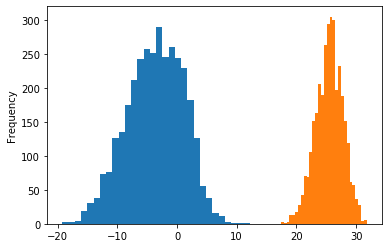

In [28]:
# 8월의 최고기온데이터의 라인차트
df['month']=df.date.apply(lambda x:x.split('-')[1])
df[df.month=='01'].avertemp.plot(kind='hist', bins=30)
df[df.month=='08'].avertemp.plot(kind='hist', bins=30)

In [33]:
# year컬럼 만들기
df['year'] = df.date.apply(lambda x:x.split('-')[0])
df.head()

,date,avertemp,mintemp,maxtemp,month,year
0,1907-10-01,13.5,7.9,20.7,10,1907
1,1907-10-02,16.2,7.9,22.0,10,1907
2,1907-10-03,16.2,13.1,21.3,10,1907
3,1907-10-04,16.5,11.2,22.0,10,1907
4,1907-10-05,17.6,10.9,25.4,10,1907


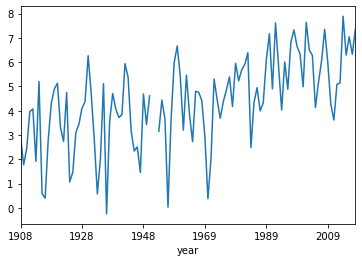

In [41]:
# 평균기온이 상슷추세인가?
# df.groupby('year').avertemp.mean().plot()
df[df.month=='03'].groupby('year').avertemp.mean().plot()

In [49]:
# 일교차가 가장 큰 월은 언제인가
# 일교차 컬럼 만들기
df['difftemp'] = df.maxtemp - df.mintemp
df.head()
# 각 월당 일교차 평균 구하기
df.groupby('month').difftemp.mean().sort_values(ascending=False)

month
10    10.923733
05    10.868827
04    10.837664
06     9.760561
03     9.566308
09     9.521132
11     9.407477
02     8.858164
01     8.424522
12     8.254391
08     7.985951
07     7.375550
Name: difftemp, dtype: float64